### imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [12]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [13]:
print(f'Train has a shape of {train.shape}')
print(f'Test has a shape of {test.shape}')

Train has a shape of (891, 12)
Test has a shape of (418, 11)


# Preprocessing

## Duplicates

In [14]:
print(f'There are {train.duplicated().sum()} duplicates in the train set.')
print(f'There are {test.duplicated().sum()} duplicates in the test set.')

There are 0 duplicates in the train set.
There are 0 duplicates in the test set.


## Null values

In [15]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

### Drop 'Cabin' column

In [16]:
print(f'There are {train.Cabin.value_counts().sum()} different values for the "Cabin" class in the train set. It can be discarded')
print(f'There are {test.Cabin.value_counts().sum()} different values for the "Cabin" class in the test set. It can be discarded')
train = train.drop(columns='Cabin')
test = test.drop(columns='Cabin')

There are 204 different values for the "Cabin" class in the train set. It can be discarded
There are 91 different values for the "Cabin" class in the test set. It can be discarded


### Filling "Embarked" column with mode

In [17]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [20]:
most_common_embarked = dataset['Embarked'].mode()[0]
display(most_common_embarked)
train.fillna({'Embarked': most_common_embarked}, inplace=True)
test.fillna({'Embarked': most_common_embarked}, inplace=True)
print(f'There are {train.isnull().sum().Embarked} missing values in the "Embarked" column in the train set.')
print(f'There are {test.isnull().sum().Embarked} missing values in the "Embarked" column in the test set.')

'S'

There are 0 missing values in the "Embarked" column in the train set.
There are 0 missing values in the "Embarked" column in the test set.


### Age column

#### Separate by embarkation point

In [190]:
c_df = X_train[X_train['Embarked'] == 'C']
s_df = X_train[X_train['Embarked'] == 'S']
q_df = X_train[X_train['Embarked'] == 'Q']

display(c_df.head(3), s_df.head(3), q_df.head(3))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
16,17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q


In [191]:
print(
    f'There are {c_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Cherbourg.\n'
    f'This is from a total of {c_df.shape[0]} passengers who embarked here: {round((c_df.Age.isnull().sum() / c_df.shape[0]) * 100, 2)}%\n'
    '---------------------------------------------\n'
    f'There are {s_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Southampton.\n'
    f'This is from a total of {s_df.shape[0]} passengers who embarked here: {round((s_df.Age.isnull().sum() / s_df.shape[0]) * 100, 2)}%\n'
    '---------------------------------------------\n'
    f'There are {q_df.Age.isnull().sum()} missing values in the "Age" column in embarkations in Queenstown.\n'
    f'This is from a total of {q_df.shape[0]} passengers who embarked here: {round((q_df.Age.isnull().sum() / q_df.shape[0]) * 100, 2)}%\n'
)

There are 38 missing values in the "Age" column in embarkations in Cherbourg.
This is from a total of 168 passengers who embarked here: 22.62%
---------------------------------------------
There are 90 missing values in the "Age" column in embarkations in Southampton.
This is from a total of 646 passengers who embarked here: 13.93%
---------------------------------------------
There are 49 missing values in the "Age" column in embarkations in Queenstown.
This is from a total of 77 passengers who embarked here: 63.64%



##### Ages Cherbourg

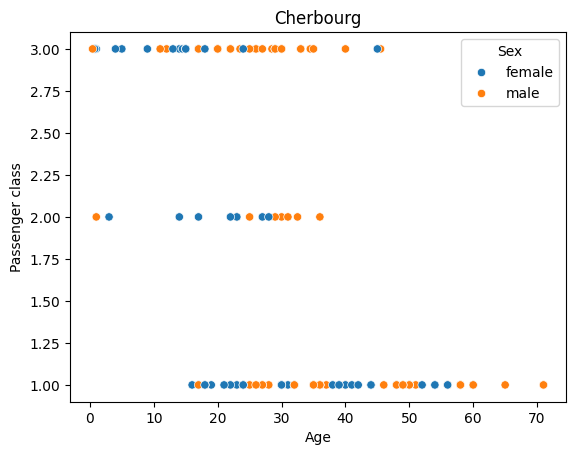

In [192]:
sns.scatterplot(x=c_df['Age'], y=c_df['Pclass'], hue=c_df['Sex'])
plt.title('Cherbourg')
plt.xlabel('Age')
plt.ylabel('Passenger class');

In [193]:
probs_c = c_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

grouped_stats = probs_c.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

/tmp/ipykernel_61052/2613748313.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_c['Pclass'], y=probs_c['mean'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[0], ci=None)
/tmp/ipykernel_61052/2613748313.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_c['Pclass'], y=probs_c['median'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[1], ci=None)
/tmp/ipykernel_61052/2613748313.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_c['Pclass'], y=probs_c['mode'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[2], ci=None)


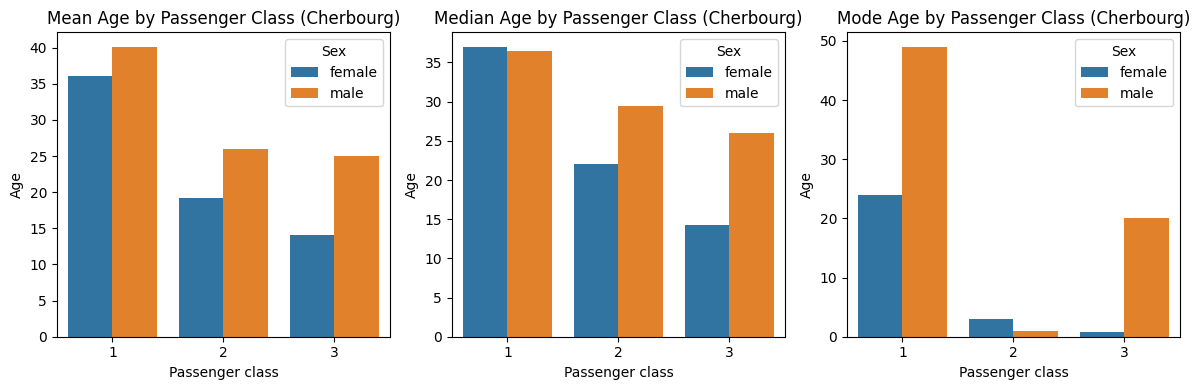

In [194]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_c['Pclass'], y=probs_c['mean'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Cherbourg)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_c['Pclass'], y=probs_c['median'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Cherbourg)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_c['Pclass'], y=probs_c['mode'], hue=probs_c['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Cherbourg)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

##### Ages Southampton

,Sex,Pclass,mean,median,mode
0,female,1,33.456522,34.0,35.0
1,female,2,29.719697,29.0,24.0
2,female,3,23.223684,23.0,18.0
3,male,1,41.897188,42.0,36.0
4,male,2,30.875889,30.0,34.0
5,male,3,26.574766,25.0,21.0


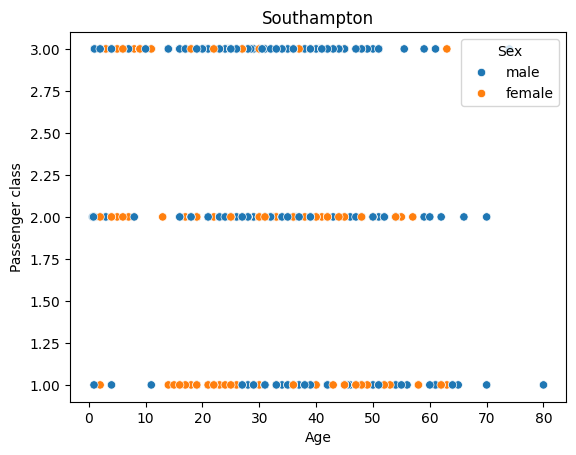

In [195]:
sns.scatterplot(x=s_df['Age'], y=s_df['Pclass'], hue=s_df['Sex'])
plt.title('Southampton')
plt.xlabel('Age')
plt.ylabel('Passenger class');

probs_s = s_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

probs_s.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

display(probs_s)

/tmp/ipykernel_61052/1750511414.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_s['Pclass'], y=probs_s['mean'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[0], ci=None)
/tmp/ipykernel_61052/1750511414.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_s['Pclass'], y=probs_s['median'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[1], ci=None)
/tmp/ipykernel_61052/1750511414.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_s['Pclass'], y=probs_s['mode'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[2], ci=None)


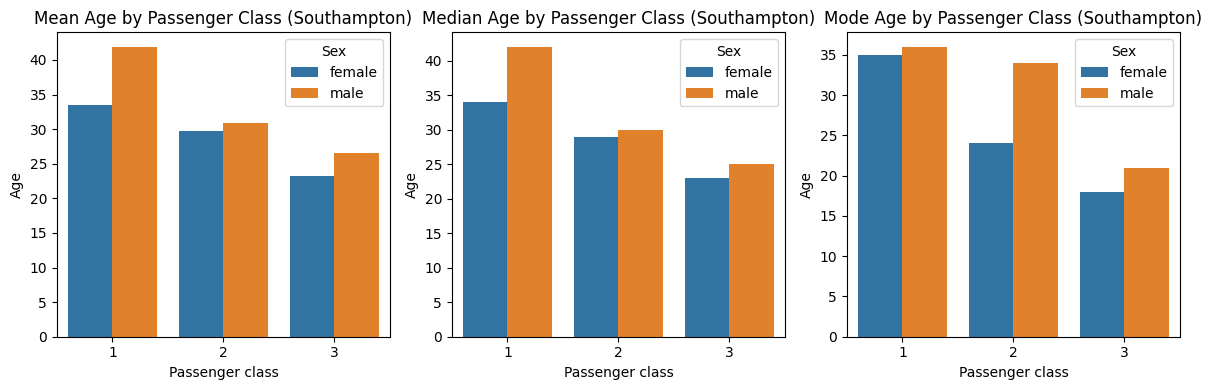

In [196]:
grouped_stats = probs_s

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_s['Pclass'], y=probs_s['mean'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Southampton)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_s['Pclass'], y=probs_s['median'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Southampton)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_s['Pclass'], y=probs_s['mode'], hue=probs_s['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Southampton)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

##### Ages Queenstown

,Sex,Pclass,mean,median,mode
0,female,1,33.000000,33.0,33.0
1,female,2,30.000000,30.0,30.0
2,female,3,22.850000,20.0,16.0
3,male,1,44.000000,44.0,44.0
4,male,2,57.000000,57.0,57.0
5,male,3,28.142857,27.0,2.0


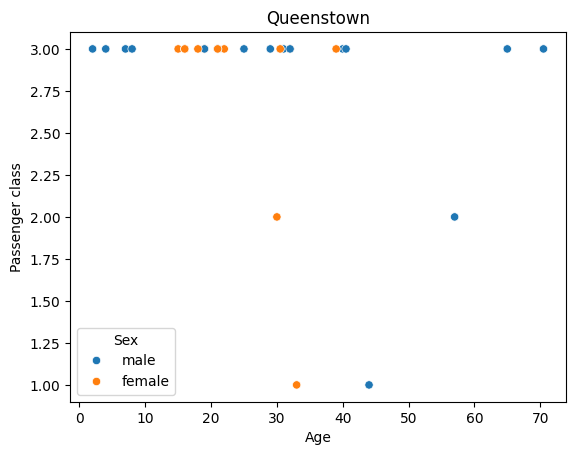

In [197]:
sns.scatterplot(x=q_df['Age'], y=q_df['Pclass'], hue=q_df['Sex'])
plt.title('Queenstown')
plt.xlabel('Age')
plt.ylabel('Passenger class');

probs_q = q_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

probs_q.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

display(probs_q)

/tmp/ipykernel_61052/1839837141.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_q['Pclass'], y=probs_q['mean'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[0], ci=None)
/tmp/ipykernel_61052/1839837141.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_q['Pclass'], y=probs_q['median'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[1], ci=None)
/tmp/ipykernel_61052/1839837141.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=probs_q['Pclass'], y=probs_q['mode'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[2], ci=None)


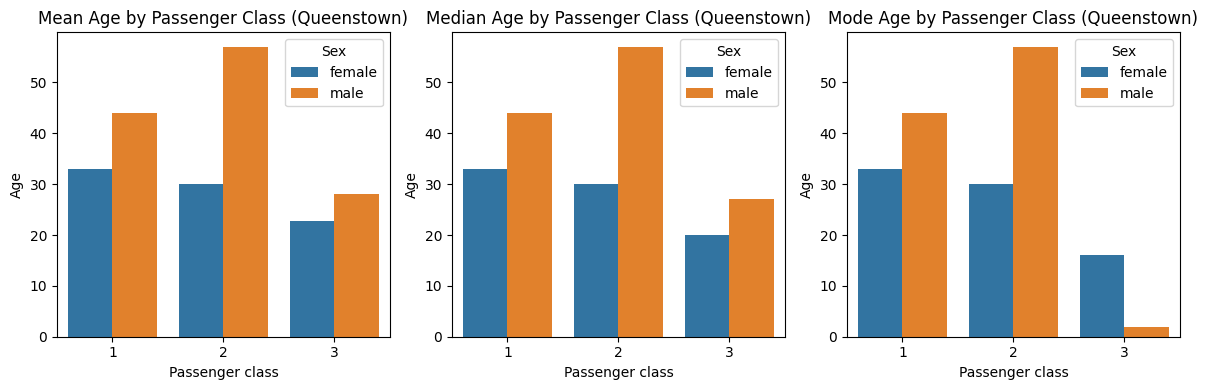

In [198]:
grouped_stats = probs_q

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.barplot(x=probs_q['Pclass'], y=probs_q['mean'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[0], ci=None)
axes[0].set_title('Mean Age by Passenger Class (Queenstown)')
axes[0].set_xlabel('Passenger class')
axes[0].set_ylabel('Age')
axes[0].legend(title='Sex')

sns.barplot(x=probs_q['Pclass'], y=probs_q['median'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[1], ci=None)
axes[1].set_title('Median Age by Passenger Class (Queenstown)')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylabel('Age')
axes[1].legend(title='Sex')

sns.barplot(x=probs_q['Pclass'], y=probs_q['mode'], hue=probs_q['Sex'], data=grouped_stats, ax=axes[2], ci=None)
axes[2].set_title('Mode Age by Passenger Class (Queenstown)')
axes[2].set_xlabel('Passenger class')
axes[2].set_ylabel('Age')
axes[2].legend(title='Sex')

plt.tight_layout()
plt.show()

#### Fill in missing ages by Embarked, Sex and Pclass

In [199]:
median_age_by_features = X_train.groupby(['Embarked', 'Sex', 'Pclass'])['Age'].median()
median_age_by_features

Embarked  Sex     Pclass
C         female  1         37.00
                  2         22.00
                  3         14.25
          male    1         36.50
                  2         29.50
                  3         26.00
Q         female  1         33.00
                  2         30.00
                  3         20.00
          male    1         44.00
                  2         57.00
                  3         27.00
S         female  1         34.00
                  2         29.00
                  3         23.00
          male    1         42.00
                  2         30.00
                  3         25.00
Name: Age, dtype: float64

In [200]:
def fill_missing_age(row):
    return median_age_by_features.loc[row['Embarked'], row['Sex'], row['Pclass']]

missing_age_mask = X_train['Age'].isnull()
X_train.loc[missing_age_mask, 'Age'] = X_train[missing_age_mask].apply(fill_missing_age, axis=1)

X_train.Age.isnull().sum()

0

### Checking for outliers

In [201]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


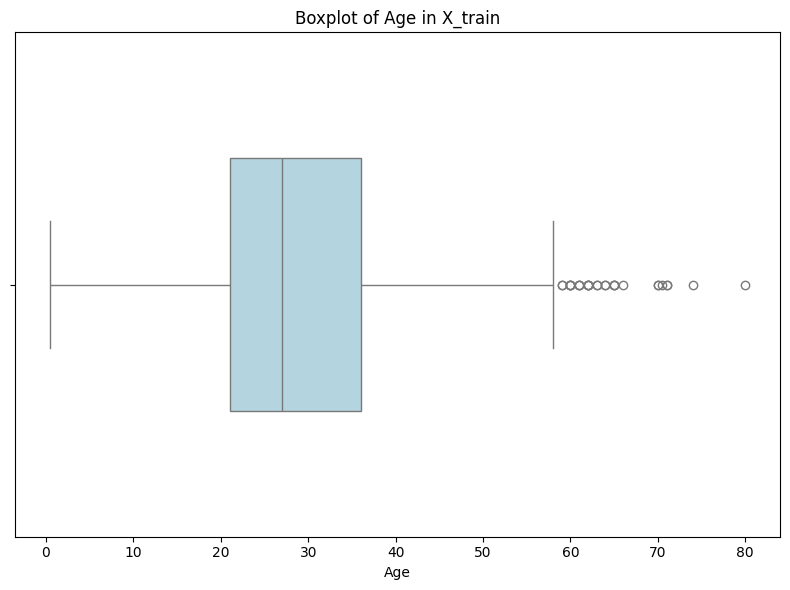

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train['Age'], orient='', width=0.5, color='lightblue')

# Add title and labels
plt.title('Boxplot of Age in X_train')
plt.xlabel('Age')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Remove Name and Ticket from X

In [203]:
X_train = X_train.drop(columns=['Name', 'Ticket'])
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


### Encode Sex Column

In [204]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded_sex = enc.fit_transform(X_train[['Sex']]).toarray()

encoded_sex_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded column with the original DataFrame
X_train = pd.concat([X_train.drop(['Sex'], axis=1), encoded_sex_df], axis=1)

X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,S,0.0,1.0
1,2,1,38.0,1,0,71.2833,C,1.0,0.0
2,3,3,26.0,0,0,7.9250,S,1.0,0.0
3,4,1,35.0,1,0,53.1000,S,1.0,0.0
4,5,3,35.0,0,0,8.0500,S,0.0,1.0


### Encode Embarked Column

In [205]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Embarked'] = le.fit_transform(X_train['Embarked'])



# C = 1
# S = 2


X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,2,0.0,1.0
1,2,1,38.0,1,0,71.2833,0,1.0,0.0
2,3,3,26.0,0,0,7.9250,2,1.0,0.0
3,4,1,35.0,1,0,53.1000,2,1.0,0.0
4,5,3,35.0,0,0,8.0500,2,0.0,1.0


In [206]:
X_train.shape

(891, 9)

# Create Random Forest Model

In [207]:
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712, 1), (179, 1))

In [210]:
y_train = y_train.values.ravel()

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((712, 9), (179, 9), (712,), (179, 1))

In [211]:
rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params_1 = grid_search.best_params_

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; to

In [212]:
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

majority_class = np.bincount(y_train).argmax()
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.59


array([[93, 12],
       [23, 51]])

,precision,recall,f1-score,support
0,0.80,0.89,0.84,105.0
1,0.81,0.69,0.74,74.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.81,0.79,0.79,179.0
weighted avg,0.80,0.80,0.80,179.0


"Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}"

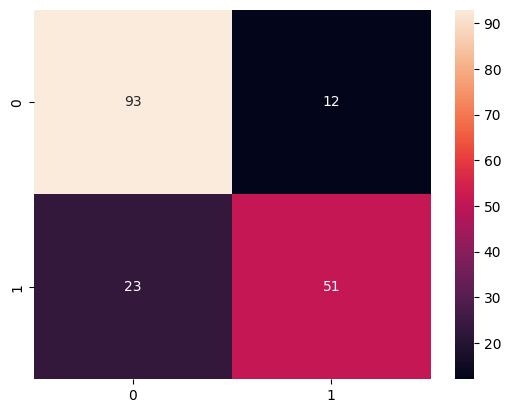

In [213]:
display(conf_matrix)
display(heatmap = sns.heatmap(conf_matrix, annot=True))
display(report_df)
display(f'Best Params: {best_params_1}')

# Results

In [214]:
    display(f'The Random Forest Classifier correctly identifies {conf_matrix[0][0]}/{conf_matrix[0][0]+conf_matrix[0][1]} of passengers who perished, while correctly identifying {conf_matrix[1][1]}/{conf_matrix[1][0]+conf_matrix[1][1]} passengers that survived.')

'The Random Forest Classifier correctly identifies 93/105 of passengers who perished, while correctly identifying 51/74 passengers that survived.'

In [223]:
best_rf_clf = grid_search.best_estimator_

# Get feature importances
importances = best_rf_clf.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X is your DataFrame containing features

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features (adjust as needed)
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

Top 10 Most Important Features:
       Feature  Importance
7   Sex_female    0.239674
8     Sex_male    0.208349
5         Fare    0.144363
2          Age    0.118093
1       Pclass    0.114447
0  PassengerId    0.089961
3        SibSp    0.037749
6     Embarked    0.025682
4        Parch    0.021682


In [224]:
test = pd.read_csv('data/test.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Duplicates

In [225]:
print(f'There are {test.duplicated().sum()} duplicates in this data set.')

There are 0 duplicates in this data set.


## Null values

In [226]:
test.isnull().sum()

print(f'There are {test.isnull().sum().Age} missing values in the "Age" column.\n'
'---------------------------------------------\n'
f'There are {test.isnull().sum().Cabin} missing values in the "Cabin column".\n'
'---------------------------------------------\n'
f'There are {test.isnull().sum().Embarked} missing values in the "Embarked" column.')

There are 86 missing values in the "Age" column.
---------------------------------------------
There are 327 missing values in the "Cabin column".
---------------------------------------------
There are 0 missing values in the "Embarked" column.


### Drop 'Cabin' column

In [227]:
print(f'There are {test.Cabin.value_counts().sum()} different values for the "Cabin" class. It can be discarded')
test = test.drop(columns='Cabin')
test.head()

There are 91 different values for the "Cabin" class. It can be discarded


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


#### Fill in missing ages by Embarked, Sex and Pclass

In [228]:
def fill_missing_age(row):
    return median_age_by_features.loc[row['Embarked'], row['Sex'], row['Pclass']]

missing_age_mask = test['Age'].isnull()
test.loc[missing_age_mask, 'Age'] = test[missing_age_mask].apply(fill_missing_age, axis=1)

test.Age.isnull().sum()

0

## Remove Name and Ticket from X

In [229]:
test = test.drop(columns=['Name', 'Ticket'])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


### Encode Sex Column

In [230]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded_sex = enc.fit_transform(test[['Sex']]).toarray()

encoded_sex_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded column with the original DataFrame
test = pd.concat([test.drop(['Sex'], axis=1), encoded_sex_df], axis=1)

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,Q,0.0,1.0
1,893,3,47.0,1,0,7.0000,S,1.0,0.0
2,894,2,62.0,0,0,9.6875,Q,0.0,1.0
3,895,3,27.0,0,0,8.6625,S,0.0,1.0
4,896,3,22.0,1,1,12.2875,S,1.0,0.0


### Encode Embarked Column

In [231]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['Embarked'] = le.fit_transform(test['Embarked'])



# C = 1
# S = 2


test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,1,0.0,1.0
1,893,3,47.0,1,0,7.0000,2,1.0,0.0
2,894,2,62.0,0,0,9.6875,1,0.0,1.0
3,895,3,27.0,0,0,8.6625,2,0.0,1.0
4,896,3,22.0,1,1,12.2875,2,1.0,0.0


In [232]:
predictions = best_rf_clf.predict(test)


In [233]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission_2.csv', index=False)
print("Submission file generated successfully.")

Submission file generated successfully.
